## Assigment 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from a6_utils import drawEllipse

### Exercise 1

### A

A = (3, 4), B = (3, 6), C = (7, 6), and D = (6, 4)  

mean value of X = (3 + 3 + 7 + 6, 4 + 6 + 6 + 4) / 4 = (19, 20) / 4 = (4.75, 5)  

centered X matrix:

$$\begin{bmatrix} -1.75 & -1.75 & 2.25 & 1.25 \\ -1 & 1 & 1 & -1 \end{bmatrix}$$

covariance matrix: 

$$\begin{bmatrix} \frac{17}{4} & \frac{1}{4} \\ \frac{1}{4} & 1 \end{bmatrix}$$


### B

In [127]:
def mean_value(X):
    return np.sum(X, axis=1)/X.shape[1]

def centered(X):
    return X - mean_value(X)[:,None]

def covariance_matrix(X):
    return np.dot(centered(X), centered(X).T)/(X.shape[1])

def eigenvalues_vectors(X):
    u, s, vh = np.linalg.svd(covariance_matrix(X))
    return s, u


In [128]:
points = np.fromfile('./assigments/assignment6/data/points.txt', dtype=float, sep=' ').reshape(-1, 2).T
points

array([[1., 6., 5., 1., 0.],
       [0., 2., 4., 3., 1.]])

1.2355910174416886 0.6879788060815627


(-2.0, 8.0)

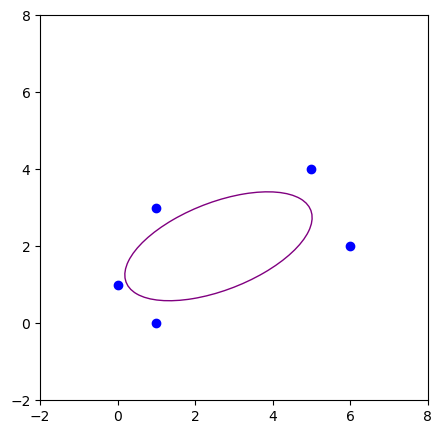

In [129]:
fig = plt.figure(figsize=(5,5))

plt.scatter(points[0], points[1], color='blue')
drawEllipse(mean_value(points), covariance_matrix(points), n_std=1)

plt.xlim(-2, 8)
plt.ylim(-2, 8)

### C

In [130]:
evalues, evectors = eigenvalues_vectors(points)
evalues, evectors

(array([6.55180546, 1.28819454]),
 array([[-0.92992935, -0.36773822],
        [-0.36773822,  0.92992935]]))

1.2355910174416886 0.6879788060815627


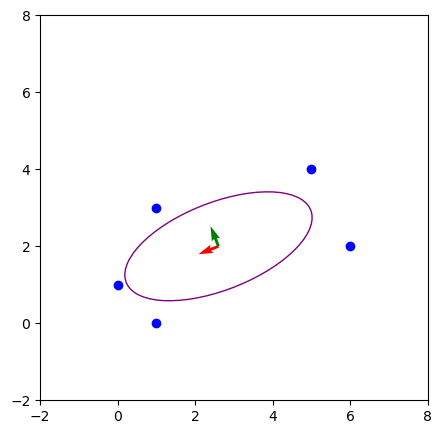

In [132]:
fig = plt.figure(figsize=(5,5))

plt.scatter(points[0], points[1], color='blue')
drawEllipse(mean_value(points), covariance_matrix(points), n_std=1)

plt.xlim(-2, 8)
plt.ylim(-2, 8)

mean_point = mean_value(points)

plt.quiver(*mean_point, *evectors[:, 0], color='red')
plt.quiver(*mean_point, *evectors[:, 1], color='green')

### D

<BarContainer object of 2 artists>

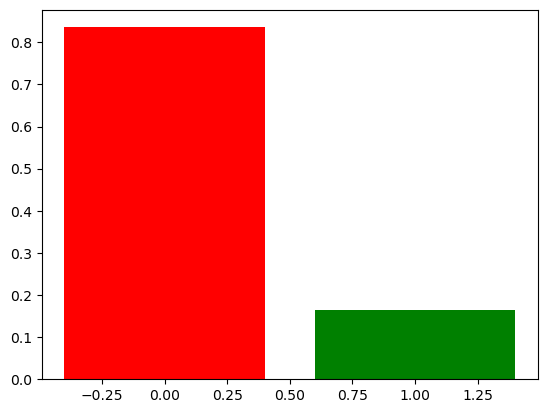

In [133]:
# plot the eigenvalues
plt.bar([0, 1], evalues/np.sum(evalues), color=['red', 'green'])

### E

(-5.0, 5.0)

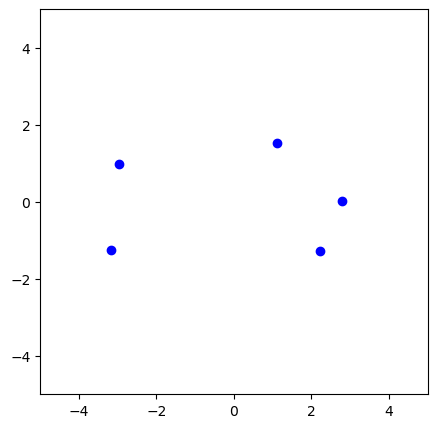

In [134]:
fig = plt.figure(figsize=(5,5))

pca_points = np.dot(evectors.T, centered(points))
plt.scatter(pca_points[0], pca_points[1], color='blue')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [135]:
# 'projected' points
pca_projected_points = pca_points.copy()
pca_projected_points[1] = 0

reconstructed_points = np.dot(evectors, pca_projected_points) + mean_value(points)[:, None]

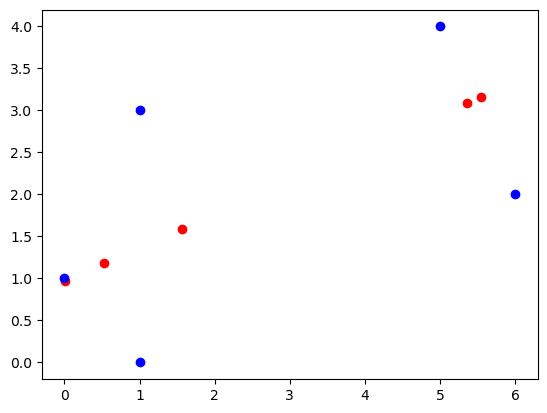

In [136]:
plt.scatter(reconstructed_points[0], reconstructed_points[1], color='red')
plt.scatter(points[0], points[1], color='blue')

### F

In [137]:
q_point = np.array([[6], [6]])

closes_point = np.argmin(np.linalg.norm(points - q_point, axis=0))

pca_q_point = np.dot(evectors.T, q_point - mean_value(points)[:, None])
pca_q_point[1] = 0

reconstructed_q_point = np.dot(evectors, pca_q_point) + mean_value(points)[:, None]

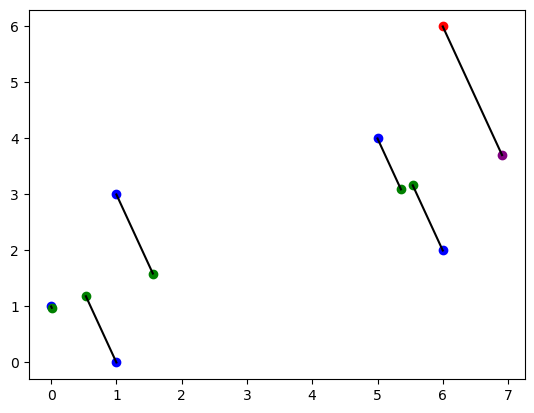

In [138]:
plt.scatter(points[0], points[1], color='blue')
plt.scatter(q_point[0], q_point[1], color='red')

plt.scatter(reconstructed_points[0], reconstructed_points[1], color='green')
plt.scatter(reconstructed_q_point[0], reconstructed_q_point[1], color='purple')

plt.plot([q_point[0], reconstructed_q_point[0]], [q_point[1], reconstructed_q_point[1]], color='black')
for i in range(points.shape[1]):
    plt.plot([points[0, i], reconstructed_points[0, i]], [points[1, i], reconstructed_points[1, i]], color='black')

## Exercise 2

In [139]:
def dual_pca(X):
    X_centered = centered(X)
    dual_cov = np.matmul(X_centered.T, X_centered) / X.shape[1]
    u, s, vh = np.linalg.svd(dual_cov)

    e = np.empty((X.shape[1], X.shape[0]))
    for i in range(X.shape[1]):
        e[i] = np.dot(X_centered, u[:, i]) / np.sqrt(X.shape[1] * s[i])
    return e

In [143]:
U = dual_pca(points).T
U[:, :2] # same as pca

array([[ 0.92992935, -0.36773822],
       [ 0.36773822,  0.92992935]])

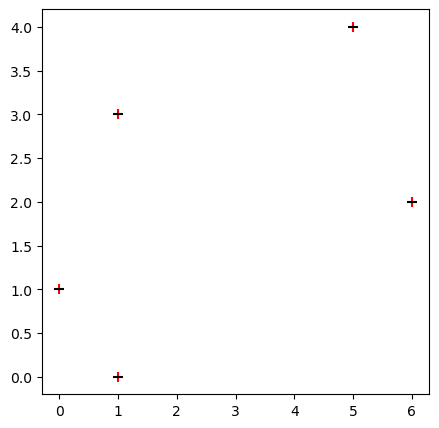

In [160]:
# offset
offset = mean_value(points)[:, None]

# project points
projected_points = np.dot(U.T, points - offset)

# reconstructed points
reconstructed_points = np.dot(U, projected_points) + offset

# plot
fig = plt.figure(figsize=(5,5))
plt.scatter(points[0], points[1], color='red', marker='|', s=50)
plt.scatter(reconstructed_points[0], reconstructed_points[1], color='black', marker='_', s=50)